In [1]:
import pandas as pd
import math
from decimal import *
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
def bin_prob1(n, p, k):
    arr = math.factorial(n) / math.factorial(k) / math.factorial(n - k)
    bp = arr * (p ** k) * ((1 - p) ** (n - k))
    return bp

In [3]:
def bin_prob2(n, p, k):
    arr = math.factorial(n) // math.factorial(k) // math.factorial(n - k)
    bp = arr * (p ** k) * ((1 - p) ** (n - k))
    return bp

In [4]:
def bin_prob(n, p, k):
    # instantiate a Decimal context
    ctx = Context()
    # Python can make arbitrarily large integers, limited only by RAM
    # Use // to keep them integer
    arr = math.factorial(n) // math.factorial(k) // math.factorial(n - k)
    bp = Decimal(arr) * ctx.power(Decimal(p), Decimal(k)) * ctx.power(Decimal(1 - p), Decimal(n - k))
    return float(bp)

In [5]:
# number of objects picked from the pile
n = 2000
# fraction of the original pile that are type A
p = 0.2
df = pd.DataFrame({'probability': [0.0] * (n + 1)})

# compute probabilities for all k
for k in tqdm(range(n + 1)):
    df.loc[k] = bin_prob(n, p, k)

In [6]:
print(df)

        probability
0     1.513471e-194
1     7.567353e-192
2     1.890892e-189
3     3.148336e-187
4     3.929516e-185
5     3.921657e-183
6     3.259878e-181
7     2.321499e-179
8     1.445858e-177
9     8.000416e-176
10    3.982207e-174
11    1.801044e-172
12    7.463075e-171
13    2.853191e-169
14    1.012373e-167
15    3.350956e-166
16    1.039320e-164
17    3.032368e-163
18    8.351648e-162
19    2.178022e-160
20    5.393327e-159
21    1.271284e-157
22    2.858945e-156
23    6.146731e-155
24    1.265842e-153
25    2.501305e-152
26    4.750074e-151
27    8.682079e-150
28    1.529441e-148
29    2.600050e-147
...             ...
1971   0.000000e+00
1972   0.000000e+00
1973   0.000000e+00
1974   0.000000e+00
1975   0.000000e+00
1976   0.000000e+00
1977   0.000000e+00
1978   0.000000e+00
1979   0.000000e+00
1980   0.000000e+00
1981   0.000000e+00
1982   0.000000e+00
1983   0.000000e+00
1984   0.000000e+00
1985   0.000000e+00
1986   0.000000e+00
1987   0.000000e+00
1988   0.000000e+00


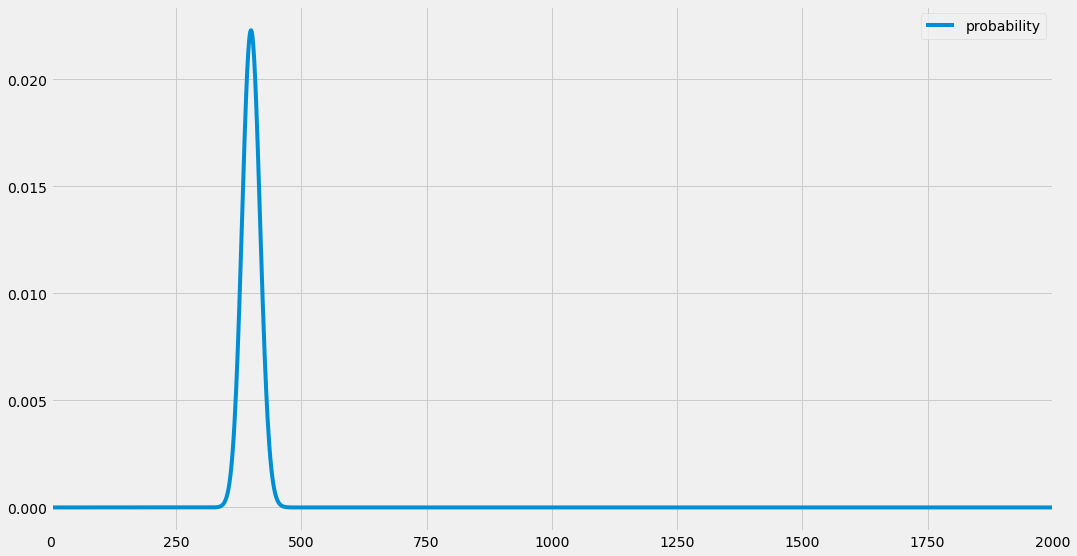

In [7]:
df.plot(figsize=(16,9));

In [8]:
dfcs = df.cumsum()
dfcs.rename(columns={'probability': 'cumulative probability'}, inplace=True)
print(dfcs)

      cumulative probability
0              1.513471e-194
1              7.582488e-192
2              1.898475e-189
3              3.167320e-187
4              3.961190e-185
5              3.961269e-183
6              3.299490e-181
7              2.354494e-179
8              1.469403e-177
9              8.147357e-176
10             4.063681e-174
11             1.841681e-172
12             7.647243e-171
13             2.929663e-169
14             1.041670e-167
15             3.455123e-166
16             1.073871e-164
17             3.139756e-163
18             8.665624e-162
19             2.264678e-160
20             5.619795e-159
21             1.327482e-157
22             2.991693e-156
23             6.445900e-155
24             1.330301e-153
25             2.634335e-152
26             5.013507e-151
27             9.183430e-150
28             1.621276e-148
29             2.762178e-147
...                      ...
1971            1.000000e+00
1972            1.000000e+00
1973          

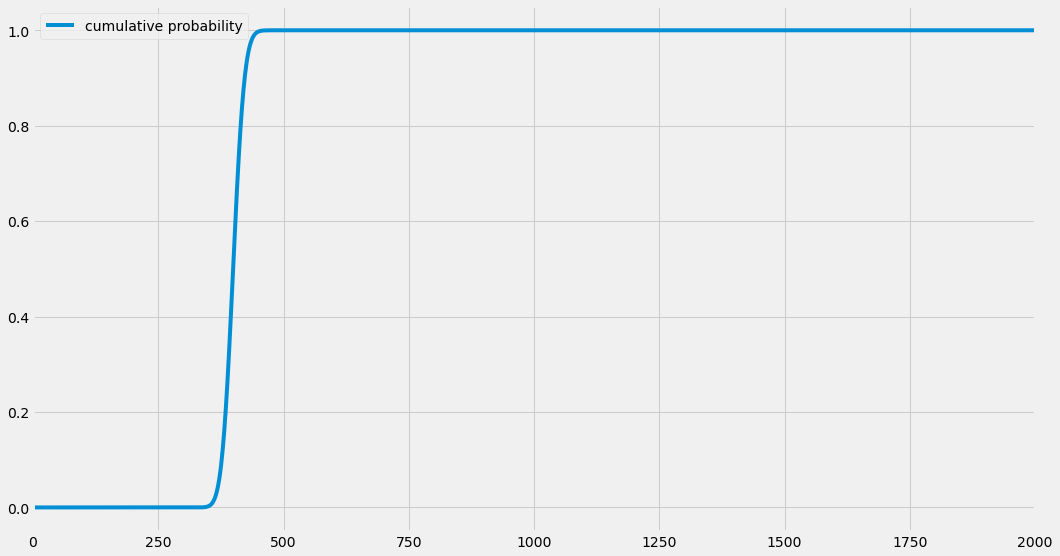

In [9]:
dfcs.plot(figsize=(16,9));

In [10]:
dfcs.loc[int(n * p)]

cumulative probability    0.513377
Name: 400, dtype: float64

If n is large enough, and p is not too extreme, the distribution is near-normal. In that case it makes sense to calculate typical stats stuff:

In [11]:
print('mean:', n * p)
print('standard deviation:', (n * p * (1 - p)) ** 0.5)

mean: 400.0
standard deviation: 17.88854381999832
